# Sarah Li-Wong

## Research question/interests
I am interested in analyzing the dataset to learn if there is a correlation between where a track was produced and how many times it was listened to.

## Task 1: Exploratory Data Analysis (EDA)

In [34]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings

warnings.simplefilter(action='ignore')

## Raw Data

Loaded the raw dataset

In [7]:
data = pd.read_csv("../data/raw/tracks.csv", low_memory=False)

Preview and statistics of the raw dataset that I will be using.

In [8]:
print("Number of rows and columns respectively:", data.shape)
print("Columns in the dataset:", data.columns)

Number of rows and columns respectively: (106576, 53)
Columns in the dataset: Index(['Unnamed: 0', 'album', 'album.1', 'album.2', 'album.3', 'album.4',
       'album.5', 'album.6', 'album.7', 'album.8', 'album.9', 'album.10',
       'album.11', 'album.12', 'artist', 'artist.1', 'artist.2', 'artist.3',
       'artist.4', 'artist.5', 'artist.6', 'artist.7', 'artist.8', 'artist.9',
       'artist.10', 'artist.11', 'artist.12', 'artist.13', 'artist.14',
       'artist.15', 'artist.16', 'set', 'set.1', 'track', 'track.1', 'track.2',
       'track.3', 'track.4', 'track.5', 'track.6', 'track.7', 'track.8',
       'track.9', 'track.10', 'track.11', 'track.12', 'track.13', 'track.14',
       'track.15', 'track.16', 'track.17', 'track.18', 'track.19'],
      dtype='object')


In [9]:
data

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106571,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106572,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106573,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106574,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


These are the top five rows of the tracks dataset. The output shows that we have 106576 entries with 53 columns. The column name data is divided between the header row and row 0. Row 1 and on shows the numeric data.

In [10]:
data.describe().T

,count,unique,top,freq
Unnamed: 0,106575,106575,track_id,1
album,106575,19,0,84660
album.1,103046,14341,2015-01-26 13:04:57,310
album.2,70295,3670,2008-01-01 00:00:00,667
album.3,15296,623,Ernie Indradat,876
album.4,106575,45,0,53679
album.5,106575,14855,-1,1025
album.6,83150,11076,"<p class=""p1"" style=""margin: 0px; padding: 8px...",310
album.7,106575,10093,-1,3529
album.8,18061,761,Joe Belock,855


Summary statistics table that indicates the spread of the data. Can be used later to compare with the histograms.

In [11]:
# This command prints each column's header row and sub-categories at row 0.
data.iloc[0]

Unnamed: 0                  NaN
album                  comments
album.1            date_created
album.2           date_released
album.3                engineer
album.4               favorites
album.5                      id
album.6             information
album.7                 listens
album.8                producer
album.9                    tags
album.10                  title
album.11                 tracks
album.12                   type
artist        active_year_begin
artist.1        active_year_end
artist.2      associated_labels
artist.3                    bio
artist.4               comments
artist.5           date_created
artist.6              favorites
artist.7                     id
artist.8               latitude
artist.9               location
artist.10             longitude
artist.11               members
artist.12                  name
artist.13      related_projects
artist.14                  tags
artist.15               website
artist.16        wikipedia_page
set     

## Task 2: Data Analysis Pipeline

The code below allows us to check for missing values in the dataframe. We will drop rows with missing values.

In [12]:
# Generate preview of entries with null values
if data.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(data[data.isnull().any(axis=1)].head(3))
    data.dropna(axis=0, how='any')
    plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
  Unnamed: 0     album              album.1              album.2   album.3  \
0        NaN  comments         date_created        date_released  engineer   
1   track_id       NaN                  NaN                  NaN       NaN   
2          2         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   

     album.4 album.5      album.6  album.7   album.8  ...     track.10  \
0  favorites      id  information  listens  producer  ...  information   
1        NaN     NaN          NaN      NaN       NaN  ...          NaN   
2          4       1      <p></p>     6073       NaN  ...          NaN   

   track.11       track.12                                           track.13  \
0  interest  language_code                                            license   
1       NaN            NaN                                                NaN   
2      4656             en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   

  track.14  trac

The code below allows us to check for duplicated entries, which we will drop if presented.

In [14]:
# Generate count statistics of duplicate entries
if len(data[data.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(data[data.duplicated()]))
    print(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


For easier understanding, we will manually rename some columns.

In [15]:
tracks_subcat = data[['Unnamed: 0','track.7', 'track.14', 'artist.12', 'artist.9', 'album.2']].rename(columns={'Unnamed: 0': 'Track ID', 'track.7': 'Genre', 'track.14': 'Listens', 'artist.12': 'Artist Name', 'artist.9': 'Location', 'album.2': 'Release Date'}).dropna(axis=0, how='any')
tracks_subcat

,Track ID,Genre,Listens,Artist Name,Location,Release Date
2,2,Hip-Hop,1293,AWOL,New Jersey,2009-01-05 00:00:00
3,3,Hip-Hop,514,AWOL,New Jersey,2009-01-05 00:00:00
4,5,Hip-Hop,1151,AWOL,New Jersey,2009-01-05 00:00:00
11,134,Hip-Hop,943,AWOL,New Jersey,2009-01-05 00:00:00
14,137,Experimental,1278,Airway,"Los Angeles, CA",2006-12-01 00:00:00
...,...,...,...,...,...,...
106570,155315,Rock,128,Spowder,New Jersey,2017-02-17 00:00:00
106571,155316,Rock,102,Spowder,New Jersey,2017-02-17 00:00:00
106572,155317,Rock,165,Spowder,New Jersey,2017-02-17 00:00:00
106573,155318,Rock,168,Spowder,New Jersey,2017-02-17 00:00:00


## Task 3: Method Chaining

In [ ]:
#Load dataset
data = pd.read_csv("../data/raw/tracks.csv", low_memory=False).dropna(axis=0, how='any').rename

#Method chaining from a function
from project_functions3 import unprocessed
data = unprocessed("../data/raw/tracks.csv")


## Task 4: Data Analysis

Now that we have Genre, Listens, Artist Name, Location, and Release Date, we can graph them individually.

Text(0.5, 0, 'Genre')

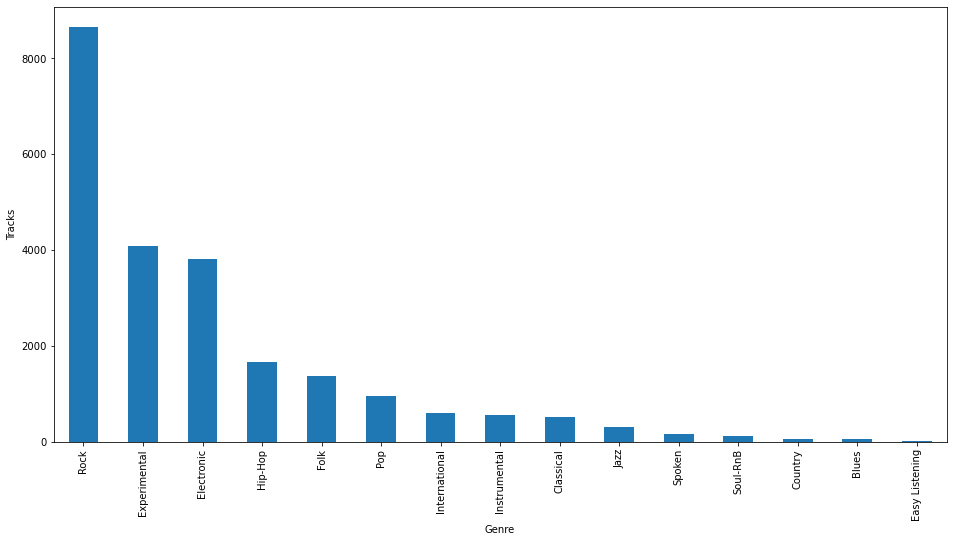

In [60]:
# Histogram for Genres in dataframe
plt.figure(figsize=(16,8))
genre_sizes = tracks_subcat.iloc[:, 1].value_counts()
genre_sizes.plot(kind='bar')
plt.ylabel('Tracks')
plt.xlabel('Genre')

The number of tracks in each genre in the dataframe is represented by this histogram. It shows that the rock genre has the most number of tracks with over 8000 tracks. 

In [28]:
#Listens by location
locations = tracks_subcat["Location"].tolist()
listens = tracks_subcat["Listens"].tolist()
d = {}
for i in range(len(locations)):
    temp = d.keys()
    if locations[i] in temp:
        for key in temp:
            if locations[i] == key:
                d[key]+=int(listens[i])
    else:
        d[locations[i]] = int(listens[i])
listens_by_location = pd.DataFrame(list(d.items()), columns=["Location", "Listens"])
listens_by_location.head()

,Location,Listens
0,New Jersey,64273
1,"Los Angeles, CA",671139
2,"Providence, RI",191439
3,"Chicago, IL",145464
4,"Baltimore, MD",166359


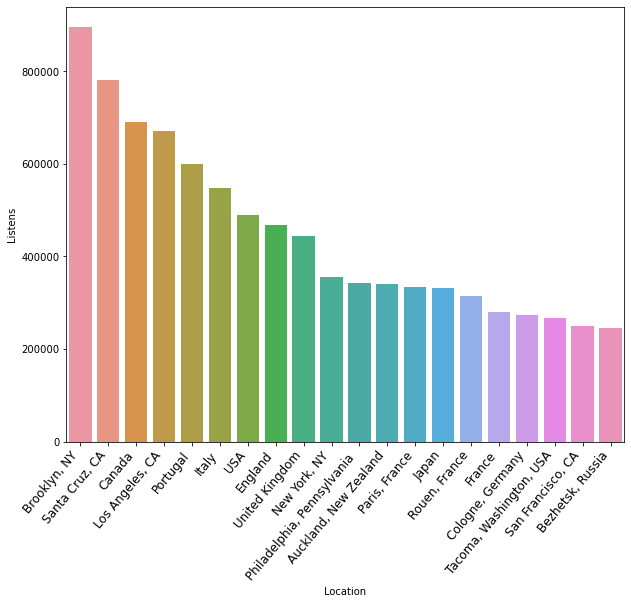

In [37]:
#Printing top 20 locations
lbl_sorted = listens_by_location.sort_values('Listens', ascending = False)
lbl_subset = lbl_sorted[:20]
plt.figure(figsize=(10,8))
sns.barplot(x = 'Location', y = 'Listens', data = lbl_subset)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()